In [1]:
import os
import os.path
import numpy as np
import shutil

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


In [11]:
# Define which folders to parse:
root_dir='/esat/opal/kkelchte/docker_home/pilot_data'

data_dirs=sorted([d for d in os.listdir(root_dir) if d.startswith('canyon_rl_turtle')])

print("cleaning up "+str(len(data_dirs))+" folders:")
print data_dirs

cleaning up 1 folders:
['canyon_rl_turtle']


Printing stats: 

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00003_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00006_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00009_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00010_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00012_canyon
/esat/opal/kkelchte/docker_home/p

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00235_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00236_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00237_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00238_canyon
untheatlhy:  few images
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00239_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00240_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00241_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00242_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00243_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00244_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00245_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00246_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00247_canyon
/esat/opal/kkelchte/docker_

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00468_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00469_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00470_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00471_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00472_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00473_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00474_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00475_canyon
untheatlhy:  few images
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00476_canyon
untheatlhy:  few images
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00477_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00478_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00479_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00480_canyon
/es

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00689_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00690_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00691_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00692_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00693_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00694_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00695_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00696_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00697_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00698_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00699_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00700_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00701_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_r

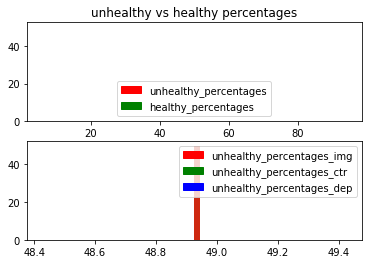

In [12]:
print("Printing stats: \n")
healthy_percentages=[]
unhealthy_percentages=[]
unhealthy_percentages_ctr=[]
unhealthy_percentages_img=[]
unhealthy_percentages_dep=[]

all_healthy=0
all_unhealthy=0

for d in data_dirs:
    healthy=[]
    unhealthy=[]
    runs=sorted([root_dir+'/'+d+'/'+r for r in os.listdir(root_dir+'/'+d) if r.startswith('00')])
    for r in runs:
        print r
        # check control and see from which image control is different than zero to get starting frame
        try:
            ctr_file=open(r+'/control_info.txt')
        except:
            unhealthy.append({'name':r,
                             'reason':'no control'})
            print 'untheatlhy: ',unhealthy[-1]['reason']
        else:
            ctr_lines=ctr_file.readlines()
            ctrs=[int(l.split(' ')[0]) for l in ctr_lines if float(l.split(' ')[1])!=0]
            if len(ctrs) == 0:
                unhealthy.append({'name':r,
                                 'reason':'no control'})
                print 'untheatlhy: ',unhealthy[-1]['reason']
                break
                
            # remove unnecessary RGB and depth images for which there is no control
#             remove_images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] 
#             remove_depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] 
            images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            if len(images) < 10:
                unhealthy.append({'name':r,
                                 'reason':'few images'})
                print 'untheatlhy: ',unhealthy[-1]['reason']
            elif len(depths) < 10:
                unhealthy.append({'name':r,
                                 'reason':'few depth'})
                print 'untheatlhy: ',unhealthy[-1]['reason']
            else:
                healthy.append({'name':r})

    
    healthy_percentages.append(100.*len(healthy)/(0.01+len(healthy)+len(unhealthy)))
    unhealthy_percentages.append(100.*len(unhealthy)/(0.01+len(healthy)+len(unhealthy)))
    unhealthy_percentages_img.append(100.*len([u for u in unhealthy if u['reason']=='few images'])/(0.01+len(unhealthy)))
    unhealthy_percentages_dep.append(100.*len([u for u in unhealthy if u['reason']=='few depth'])/(0.01+len(unhealthy)))
    unhealthy_percentages_ctr.append(100.*len([u for u in unhealthy if u['reason']=='no control'])/(0.01+len(unhealthy)))
    
    all_healthy+=len(healthy)
    all_unhealthy+=len(unhealthy)
#     print("{0} has {1} healthy and {2} unhealthy runs. \n \t {3:.1f} % lack of images \n \t {4:.1f}% lack of depth \n \t {5:.1f}% lack of control.".format(d,
#     len(healthy), 
#     len(unhealthy), 
#     100.*len([u for u in unhealthy if u['reason']=='few images'])/(0.01+len(unhealthy)), 
#     100.*len([u for u in unhealthy if u['reason']=='few depth'])/(0.01+len(unhealthy)),
#     100.*len([u for u in unhealthy if u['reason']=='no control'])/(0.01+len(unhealthy))))

# 
print("Total number of healthy runs: {0}, unhealthy runs: {1}".format(all_healthy, all_unhealthy))
# healthy runs:
plt.subplot(211)
plt.hist(healthy_percentages, 50, normed=1, facecolor='green', alpha=0.75)
plt.hist(unhealthy_percentages, 50, normed=1, facecolor='red', alpha=0.75)
plt.title('unhealthy vs healthy percentages')

red_patch = mpatches.Patch(color='red', label='unhealthy_percentages')
green_patch = mpatches.Patch(color='green', label='healthy_percentages')
plt.legend(handles=[red_patch, green_patch])

plt.subplot(212)
plt.hist(unhealthy_percentages_ctr, 50, normed=1, facecolor='green', alpha=0.75)
plt.hist(unhealthy_percentages_img, 50, normed=1, facecolor='red', alpha=0.75)
# n, bins, patches = plt.hist(unhealthy_percentages_dep, 50, normed=1, facecolor='blue', alpha=0.75)
# plt.title('unhealthy due to control (green) vs images (red) in percentages')

green_patch = mpatches.Patch(color='green', label='unhealthy_percentages_ctr')
red_patch = mpatches.Patch(color='red', label='unhealthy_percentages_img')
blue_patch = mpatches.Patch(color='blue', label='unhealthy_percentages_dep')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.show()

In [15]:
# Go through data and remove useless runs:
for d in data_dirs:
    runs=sorted([root_dir+'/'+d+'/'+r for r in os.listdir(root_dir+'/'+d) if r.startswith('00')])
    for r in runs:
        print r
        # check control and see from which image control is different than zero to get starting frame
        try:
            ctr_file=open(r+'/control_info.txt')
        except:
            print('delete.')
            shutil.rmtree(r)
        else:
            ctr_lines=ctr_file.readlines()
            ctrs=[int(l.split(' ')[0]) for l in ctr_lines if float(l.split(' ')[1])!=0]
            if len(ctrs) == 0:
                print('delete.')
                shutil.rmtree(r)
                break 
            images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            if len(images) < 10: 
                print('delete.')
                shutil.rmtree(r)
            elif len(depths) < 10: 
                print('delete.')
                shutil.rmtree(r)
            else:
                # cleanup useless images
                remove_images=sorted([r+'/RGB/'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] )
                remove_depths=sorted([r+'/Depth/'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] )
#                 print sorted(remove_images)
#                 print sorted(remove_depths)
#                 import pdb;pdb.set_trace()
                for f in remove_images: os.remove(f)
                for f in remove_depths: os.remove(f)

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00003_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00006_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00009_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00010_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00012_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_r

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00195_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00196_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00197_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00198_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00199_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00200_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00201_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00203_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00205_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00206_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00207_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00209_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00210_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_r

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00376_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00377_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00378_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00379_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00380_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00382_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00383_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00384_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00385_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00386_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00387_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00388_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00389_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_r

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00532_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00533_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00534_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00535_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00539_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00540_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00541_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00542_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00543_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00544_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00545_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00546_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00547_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_r

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00707_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00708_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00709_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00711_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00713_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00714_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00715_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00716_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00717_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00718_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00719_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00720_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00721_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_r

In [17]:
# make a final check on current data: --> in case there are still unhealthy runs rerun previous window a few times...
all_healthy=0
all_unhealthy=0

for d in data_dirs:
    healthy=[]
    unhealthy=[]
    runs=sorted([root_dir+'/'+d+'/'+r for r in os.listdir(root_dir+'/'+d) if r.startswith('00')])
    for r in runs:
#         print r
        # check control and see from which image control is different than zero to get starting frame
        try:
            ctr_file=open(r+'/control_info.txt')
        except:
            unhealthy.append({'name':r,
                             'reason':'no control'})
        else:
            ctr_lines=ctr_file.readlines()
            ctrs=[int(l.split(' ')[0]) for l in ctr_lines if float(l.split(' ')[1])!=0]
            if len(ctrs) == 0:
                unhealthy.append({'name':r,
                                 'reason':'no control'})
                break
                
            # remove unnecessary RGB and depth images for which there is no control
#             remove_images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] 
#             remove_depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) < ctrs[0]] 
            images=[r+'/RGB'+im for im in os.listdir(r+'/RGB') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            depths=[r+'/Depth'+im for im in os.listdir(r+'/Depth') if im.endswith('.jpg') and int(im.split('.')[0]) > ctrs[0]] 
            if len(images) < 10:
                unhealthy.append({'name':r,
                                 'reason':'few images'})
            elif len(depths) < 10:
                unhealthy.append({'name':r,
                                 'reason':'few depth'})
            else:
                healthy.append({'name':r})
    print("{0} has {1} healthy and {2} unhealthy runs. \n \t {3:.1f} % lack of images \n \t {4:.1f}% lack of depth \n \t {5:.1f}% lack of control.".format(d,
    len(healthy), 
    len(unhealthy), 
    100.*len([u for u in unhealthy if u['reason']=='few images'])/(0.01+len(unhealthy)), 
    100.*len([u for u in unhealthy if u['reason']=='few depth'])/(0.01+len(unhealthy)),
    100.*len([u for u in unhealthy if u['reason']=='no control'])/(0.01+len(unhealthy))))
    all_healthy+=len(healthy)
    all_unhealthy+=len(unhealthy)
print("Total number of healthy runs: {0}, unhealthy runs: {1}".format(all_healthy, all_unhealthy))


canyon_rl_turtle has 696 healthy and 0 unhealthy runs. 
 	 0.0 % lack of images 
 	 0.0% lack of depth 
 	 0.0% lack of control.
Total number of healthy runs: 696, unhealthy runs: 0


In [18]:
runs=sorted([root_dir+'/'+d for d in data_dirs])
for r in runs:
    print r
    collision_file=open(r+'/collision_info.txt','w')
    images=sorted([int(im.split('.')[0]) for im in os.listdir(r+'/RGB')])
    print images
    collision_labels={im:0 if im in images[:-10] else 1 for im in images}
    for k in sorted(collision_labels.keys()): 
#         print("{0:010d} {1}\n".format(k, collision_labels[k]))
        collision_file.write("{0:010d} {1}\n".format(k, collision_labels[k]))
    collision_file.close()
        

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle


OSError: [Errno 2] No such file or directory: '/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/RGB'

In [20]:
# For all remaining runs: create collision labels
for d in data_dirs:
    runs=sorted([root_dir+'/'+d+'/'+r for r in os.listdir(root_dir+'/'+d) if r.startswith('00')])
    for r in runs:
        print r
        collision_file=open(r+'/collision_info.txt','w')
        images=sorted([int(im.split('.')[0]) for im in os.listdir(r+'/RGB')] )
#         print images
        collision_labels={im:0 if im in images[:-10] else 1 for im in images}
        for k in sorted(collision_labels.keys()): 
            collision_file.write("{0:010d} {1}\n".format(k, collision_labels[k]))
        collision_file.close()
        

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00000_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00001_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00002_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00003_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00004_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00005_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00006_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00007_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00008_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00009_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00010_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00011_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00012_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_r

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00332_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00333_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00334_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00335_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00336_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00337_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00338_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00339_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00340_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00341_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00342_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00343_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00344_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_r

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00454_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00455_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00456_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00457_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00458_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00459_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00460_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00461_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00462_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00463_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00464_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00465_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00466_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_r

/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00667_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00668_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00669_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00670_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00671_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00672_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00673_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00674_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00675_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00676_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00677_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00678_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_rl_turtle/00679_canyon
/esat/opal/kkelchte/docker_home/pilot_data/canyon_r

In [ ]:
# Create train, val and test set